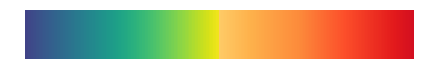

In [1]:
%matplotlib inline
import os
import math 
import numpy as np
import pandas as pd 
import seaborn as sns
import random
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from scipy.stats import pearsonr, spearmanr, gaussian_kde
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.cross_decomposition import PLSRegression
from sklearn.preprocessing import scale, StandardScaler
from statsmodels.sandbox.stats.multicomp import fdrcorrection0
from matplotlib.colors import rgb2hex
import warnings
sns.set_style('white')
pd.options.display.max_rows = 2000
pd.options.display.max_columns = 999
warnings.filterwarnings('ignore')

import os 
import pandas as pd 
import seaborn as sns 
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt 
from matplotlib import colors
import numpy as np

datadir = '/Users/kanaaax/Google Drive/TS-EUROTRAIN/RESULTS_QSMv3/dataframes/AHBA/ahba_data/'

from matplotlib import colors
import seaborn as sns 
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt 
from matplotlib import colors

ahba_dir     = '/Users/kanaaax/Google Drive/TS-EUROTRAIN/RESULTS_QSMv3/dataframes/AHBA/'
gsea_dir     = '/Users/kanaaax/Desktop/GSEA'
permute_dir  = '/Users/kanaaax/Google Drive/TS-EUROTRAIN/RESULTS_QSMv3/dataframes/permutations'
save_fig_dir = '/Users/kanaaax/Google Drive/TS-EUROTRAIN/Papers/2016_QSM_paper/Figures_python_v4'

background_genes = pd.read_csv(os.path.join(ahba_dir,'background_gene_list.txt'), sep='\t').GeneSymbol.values



cmap_drysdale = colors.ListedColormap(['#00ffff', '#00afff','#0000ff', '#260000', '#530000','#fe0000', '#ff6a00',
                                           '#ffff00'])

cmap_ted = colors.ListedColormap(['#00ffff', '#00afff','#0000ff', '#260000', '#530000','#fe0000', '#ff6a00',
                                      '#ffff00', '#ffffff'])

cmap_rdbu = colors.ListedColormap(['#d73027', '#fc8d59', '#fee090', '#e0f3f8', '#91bfdb', '#4575b4'][::-1])
cmap_rdbu2 = colors.ListedColormap(['#cb1a1e', '#e1817f', '#f1bebe', '#e0f3f8', '#91bfdb', '#4575b4'][::-1])


first = int((128*2)-np.round(255*(1.-0.50)))
second = (256-first)
colors2 = plt.cm.viridis(np.linspace(0.2, .98, first))
colors3 = plt.cm.YlOrRd(np.linspace(0.3, 0.8, second))
colors4 = plt.cm.PuBu(np.linspace(0., 0.25, second))
cols = np.vstack((colors2,colors3))
cmap_gradient = colors.LinearSegmentedColormap.from_list('my_colormap', cols)

num = 256
gradient = range(num)
for x in range(5):
    gradient = np.vstack((gradient, gradient))

fig, ax = plt.subplots(nrows=1)
ax.imshow(gradient, cmap=cmap_gradient, interpolation='nearest')
ax.set_axis_off()
fig.tight_layout()

plt.show()

In [2]:
# Read AHBA 
ahba    = pd.read_csv(os.path.join(datadir,'AHBA_20737.csv'), index_col=0)
ahba267 = pd.read_csv(os.path.join(datadir,'AHBA_20267.csv'), index_col=0)
ahba20267_chi = pd.read_csv(os.path.join(datadir,'index/AHBA_20267_index_STR3_MOTOR_tstat_CP_1mm.csv'), index_col=0)



In [3]:
# Read Chi tstat 
ahba_dir     = '/Users/kanaaax/Google Drive/TS-EUROTRAIN/RESULTS_QSMv3/dataframes/AHBA/'
MNI = pd.read_csv(os.path.join(ahba_dir,'QSM_TSTATS/MNI_NIFTI_VALUES_permute_10K_OCT2.csv'), index_col = 0 )


In [4]:
# Read PPI gene list
glist = ['GABRA1', 'GABRA2','GABRA3', 'GABRA4','NPTN','GABRA6', 'GABRG2', 'GABRB2']
glist = ['HTR4', 'HTR6', 'HTR2B', 'HTR2C', 'HTR1B', 'HTR1D', 'GRN4', 'DRD2', 'GABRA3']
glist = ['GRHPR', 'PTPRN2', 'CCM2L', 'GRM6', 'PLPPR4', 'IRP1']
glist = [ 'GABRA4', 'FIGNL2', 'DLG5', 'SYN1', 'PLPPR3', 'DNTTIP2', 'STX19', 'GRHPR', 'PTPRN2', 'CCM2L', 'GRM6', 'PLPPR4']
glist = ['FTH1P14','FTH1P20','FTHL16','FTHL17','FTL','FTLP17','FTMT']
glist = ['GRM7']

glist = ['GABRA1', 'GABRA2','GABRA3', 'GABRA4','NPTN','GABRA6', 'GABRG2', 'GABRB2',
'HTR4', 'HTR6', 'HTR2B', 'HTR2C', 'HTR1B', 'HTR1D', 'GRN4', 'DRD2', 'GABRA3',
'GRHPR', 'PTPRN2', 'CCM2L', 'GRM6', 'PLPPR4', 'IRP1', 
'GABRA4', 'FIGNL2', 'DLG5', 'SYN1', 'PLPPR3', 'DNTTIP2', 'STX19', 'GRHPR', 'PTPRN2', 'CCM2L', 'GRM6', 'PLPPR4', 
'FTH1P14','FTH1P20','FTHL16','FTHL17','FTL','FTLP17','FTMT'
]

#glist = ['FTH1P18', 'FTHL17', 'FTH1', 'FTL', 'FTMT', 
#         'FTH1P14', 'FTH1P20', 'FTHL16', 'FTHL17', 'FTL']
#glist = ['FTH1', 'FTH1P18', 'FTHL17', 'FTL']



In [24]:
# wells outside the striatal masks 
drop_wells = [2209, # donor1 claustrum	claustrum, right
              2233, # donor1 claustrum	claustrum, left
              2257, # donor1 claustrum	claustrum, right
              2265, # donor1 claustrum	claustrum, left
              2249, # donor1 claustrum	claustrum, left
              2371, # donor1 claustrum	claustrum, right
              2379, # donor1 claustrum	claustrum, left
              2977, # donor1	claustrum	claustrum, left
              5667, # donor2 claustrum	claustrum, right
              5705, # donor2	claustrum	claustrum, left
              5675, # donor2 claustrum	claustrum, left
              5769, # donor2	claustrum	claustrum, left
              5898, # donor2 dorsal thalamus	anterior group of nuclei
              11270, # donor3	corpus callosum	NaN 
              127687121, # donor5	corpus callosum	NaN
              147628210, # donor5	claustrum	claustrum, left
              147628277, # donor5 claustrum	claustrum, left
              156906844, # donor5	claustrum	claustrum, left
              160091500, # donor6 basal forebrain	septal nuclei
              #2370, # donor1 claustrum, left	 E
              126432198, 
              160091566, #   donor6 perifornical nucleus, left	tuberal region
              160091502, #   donor6 ventromedial hypothalamic nucleus, left	tuberal region
              
              159226045, # donor6 striatum//caudate nucleus//body of the caudate nucleus//body of caudate nucleus, left'
              #127687867, #  	donor4	brain//gray matter//telencephalon//cerebral nuclei//basal forebrain//substantia innominata//substantia innominata, left//basal nucleus of meynert, left	basal forebrain
              #159439119, #  	donor6	brain//gray matter//telencephalon//cerebral nuclei//basal forebrain//substantia innominata//substantia innominata, left//basal nucleus of meynert, left	basal forebrain
              #156906972, #  	donor5	brain//gray matter//telencephalon//cerebral nuclei//basal forebrain//substantia innominata//substantia innominata, left//basal nucleus of meynert, left	basal forebrain
             ]

chi_str3m  = pd.DataFrame(MNI['STR3_MOTOR_tstat_CP_1mm'].dropna())
chix = chi_str3m.drop([i for i in chi_str3m.index if i in drop_wells])


In [25]:
glist = ['GABRA1', 'GABRA2','GABRA3', 'GABRA4','NPTN','GABRA6', 'GABRG2', 'GABRB2']
#glist = [ 'GABRA4', 'FIGNL2', 'DLG5', 'SYN1', 'PLPPR3', 'DNTTIP2', 'STX19', 'GRHPR', 'PTPRN2', 'CCM2L', 'GRM6', 'PLPPR4']

#glist = ['FTH1P14','FTH1P20','FTHL16','FTHL17','FTL','FTLP17','FTMT']


In [26]:
# scale gene data 
ahba_genes = ahba.drop([i for i in ahba.columns[-28:]],axis=1)
ahba_genes_scl = (ahba_genes - ahba_genes.mean())/ahba_genes.std() 


ahba_genes_scl = pd.concat([ahba_genes_scl, chi_str3m],axis=1, sort=True)

ahba_genes_scl = ahba_genes_scl.drop([i for i in ahba_genes_scl.index if i not in ahba20267_chi.index])
ahba_genes_scl = ahba_genes_scl.drop([i for i in ahba_genes_scl.columns if i not in glist+['STR3_MOTOR_tstat_CP_1mm']],axis=1)

In [27]:
from sklearn.preprocessing import MinMaxScaler
slc_chix = pd.DataFrame(MinMaxScaler().fit_transform(chix), index = chix.index, columns=chix.columns)  

ahba_genes = ahba.drop([i for i in ahba.columns[-28:]],axis=1)
slc_ahba_genes = ahba_genes.drop([i for i in ahba_genes.index if i not in ahba20267_chi.index])
slc_ahba_genes = ahba_genes_scl.drop([i for i in ahba_genes_scl.columns if i not in glist],axis=1)
slc_ahba_genes =  pd.DataFrame(MinMaxScaler().fit_transform(ahba_genes_scl), columns=ahba_genes_scl.columns, index=ahba_genes_scl.index)


In [28]:
outx = [5058,14161,14169, 13994, 13594]
#outx = []

#ahba_genes_scl['ind'] = ['%s_%s_%s'%(ahba.loc[i]['donor'], i,ahba.loc[i]['Ontology_4']) for i in df.index]
#ahba_genes_scl = df.drop([i for i in ahba_genes_scl.index if i not in ahba20267_chi.index]).drop([i for i in df.index if i in outx],axis=0)
#ahba_genes_scl = df.set_index('ind').drop([i for i in df.columns if i in ['donor', 'Ontology_4']], axis = 1)
#del df.index.name

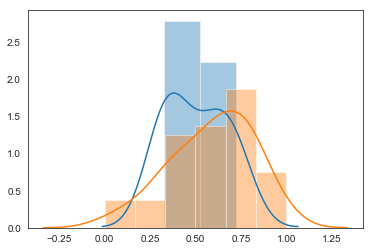

In [29]:
sns.distplot(slc_ahba_genes.mean())
sns.distplot(slc_chix)

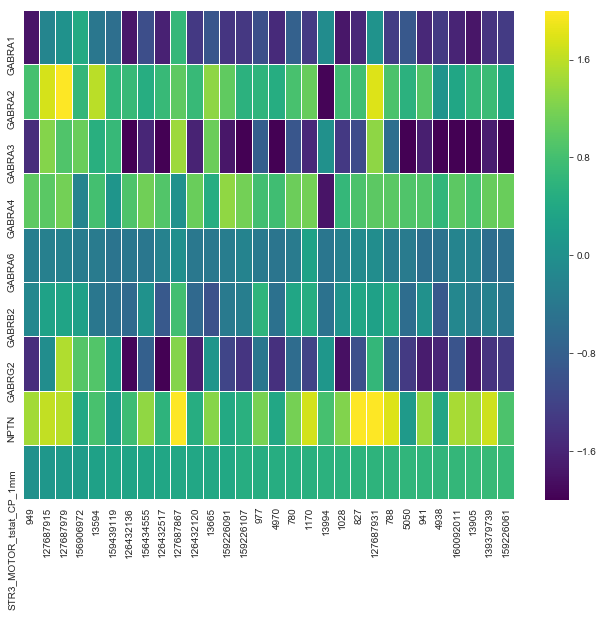

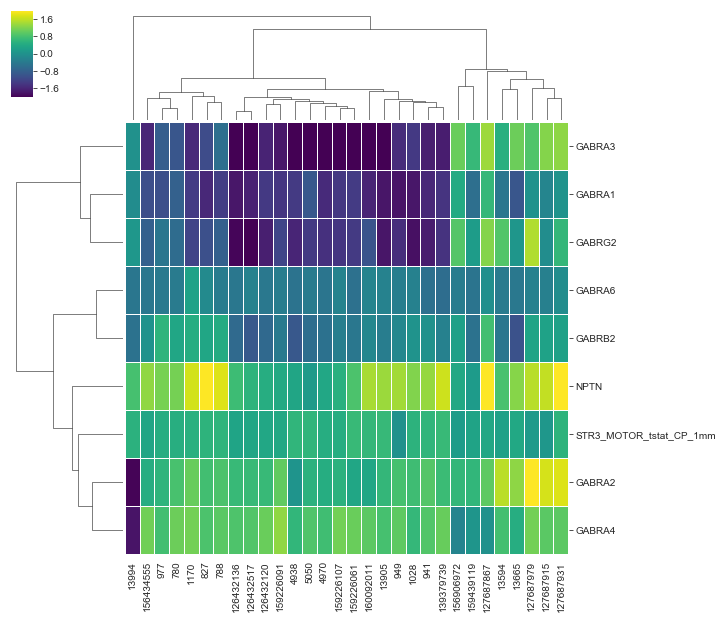

In [34]:
df_PLOT = pd.concat([slc_ahba_genes, slc_chix], axis=1).T
#df_PLOTx = df_PLOT.T.sort_values('STR3_MOTOR_tstat_CP_1mm').iloc[:30].T
#df_PLOTx = df_PLOT.T.sort_values('GABRG2').T 

vmin = -2
vmax = 2

cmap = 'viridis'
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(df_PLOTx, cmap=cmap,vmin=vmin,vmax=vmax, linewidths=.005, square=False)
sns.clustermap(df_PLOTx,cmap=cmap,vmin=vmin,vmax=vmax, row_cluster=True,col_cluster=True,linewidths=.005)





In [19]:

df_PLOT  = scl_ahba_genes.iloc[:].T *-1



vmin = -2
vmax =  3

cmap = cmap_gradient
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(df_PLOTx, cmap=cmap,vmin=vmin,vmax=vmax, linewidths=.005, square=False)
sns.clustermap(df_PLOTx,cmap=cmap,vmin=vmin,vmax=vmax, row_cluster=True,col_cluster=True,linewidths=.005)




NameError: name 'scl_ahba_genes' is not defined